# Import Libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_v3 import InceptionV3

# Read and analyse the data

In [2]:
pip install split-folders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Split data 80% training, 10% Validation, 10% testing
import splitfolders
splitfolders.ratio('data', output = "Datasets", seed=1337, ratio = (.8, 0.1, 0.1))

Copying files: 4500 files [00:31, 144.82 files/s]


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# Here we will be using imagenet weights

Inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 16s 0us/step


In [6]:
# not required to train existing weights
for layer in Inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
#For Flattening the output
x = Flatten()(Inception.output)

# Define Generator

In [9]:
# add pre-processing, augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 3600 images belonging to 9 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')


Found 450 images belonging to 9 classes.


# Define model

In [12]:
# add Fully connected last layers( as many as you like to improve the performance), 
#try-out drop-out in Fully connected layers if you think it is necessary
#def add_last_layer(model, n_classes, fc_layer_size):
    
    ## Add your code here
#    return Model

#model = InceptionV3(weights='imagenet', include_top=False)
#model = add_last_layer(model, n_classes, fc_layer_size)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=Inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Compiling model

In [14]:
#Add callbacks like early stopping, cyclical or variable learning rate or anyting you feel necessary
#opt = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=5e-04)
##add Code Here
##add model compile code here
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Training

In [15]:
#Freeze some layers first and then train the unfrozen layers it. (experiment with number of layers to freeze for best metrics)
#Next train all the layers
history_tl = model.fit_generator(train_generator, validation_data=validation_generator,epochs=30,
                                 steps_per_epoch=len(train_generator),
                                 validation_steps=len(validation_generator))


D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
29/29 [==============================] - 183s 6s/step - loss: 12.1426 - accuracy: 0.3115 - val_loss: 2.0539 - val_accuracy: 0.6622
Epoch 2/30
29/29 [==============================] - 186s 7s/step - loss: 1.6325 - accuracy: 0.7182 - val_loss: 0.9611 - val_accuracy: 0.7289
Epoch 3/30
29/29 [==============================] - 186s 6s/step - loss: 0.7460 - accuracy: 0.7826 - val_loss: 0.9530 - val_accuracy: 0.7378
Epoch 4/30
29/29 [==============================] - 182s 6s/step - loss: 0.6472 - accuracy: 0.7938 - val_loss: 0.8318 - val_accuracy: 0.7822
Epoch 5/30
29/29 [==============================] - 186s 6s/step - loss: 0.5789 - accuracy: 0.8243 - val_loss: 0.9930 - val_accuracy: 0.7578
Epoch 6/30
29/29 [==============================] - 190s 7s/step - loss: 0.5241 - accuracy: 0.8477 - val_loss: 0.7438 - val_accuracy: 0.8067
Epoch 7/30
29/29 [==============================] - 187s 6s/step - loss: 0.4329 - accuracy: 0.8617 - val_loss: 0.9722 - val_accuracy: 0.7800
Epoch 8/30
2

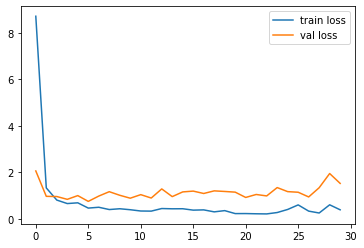

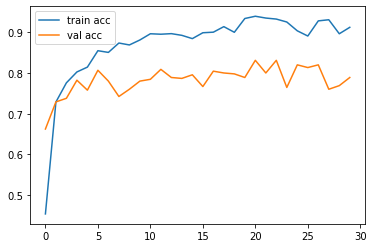

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(history_tl.history['loss'], label='train loss')
plt.plot(history_tl.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history_tl.history['accuracy'], label='train acc')
plt.plot(history_tl.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# testing

In [38]:

##add Code Here to preprocess image before testing
# Pick the best model weights for testing and test it on few images
y_pred = model.predict(validation_generator)

In [39]:
y_pred

array([[9.25490797e-01, 7.91064534e-13, 7.45092034e-02, ...,
        5.14960245e-15, 1.34387474e-18, 3.38159673e-17],
       [3.81278084e-17, 2.94275134e-24, 3.36225262e-17, ...,
        1.61201200e-20, 6.76517698e-16, 7.09097917e-24],
       [1.53569709e-11, 9.99998689e-01, 1.18958712e-06, ...,
        1.14463865e-14, 3.16433890e-18, 1.75188311e-21],
       ...,
       [2.86373138e-17, 9.79305612e-12, 1.79532041e-17, ...,
        9.99998569e-01, 8.85789916e-18, 2.10558623e-21],
       [1.12266008e-09, 1.59414671e-16, 2.39253875e-14, ...,
        2.95248819e-17, 3.35220007e-09, 1.25025492e-21],
       [4.57141443e-12, 1.46511894e-20, 2.84122378e-12, ...,
        1.00000000e+00, 6.08162180e-22, 9.07969999e-19]], dtype=float32)

In [40]:
y_pred = np.argmax(y_pred, axis=1)

In [41]:
y_pred

array([0, 5, 1, 4, 6, 0, 2, 7, 5, 4, 5, 8, 6, 7, 0, 5, 8, 0, 1, 6, 5, 5,
       1, 0, 4, 5, 8, 1, 6, 5, 5, 1, 6, 1, 1, 4, 1, 5, 2, 1, 5, 4, 6, 0,
       6, 0, 3, 7, 4, 0, 8, 0, 0, 5, 0, 4, 0, 1, 7, 3, 2, 1, 5, 8, 6, 0,
       8, 7, 2, 2, 1, 4, 0, 6, 1, 3, 6, 4, 4, 8, 6, 6, 4, 0, 7, 0, 8, 6,
       1, 8, 6, 8, 6, 4, 1, 7, 7, 8, 2, 5, 8, 8, 6, 2, 4, 4, 5, 0, 7, 4,
       4, 0, 7, 0, 8, 6, 5, 3, 2, 6, 3, 1, 8, 1, 6, 3, 2, 1, 4, 1, 5, 2,
       1, 2, 2, 5, 0, 8, 6, 1, 8, 7, 2, 4, 2, 2, 6, 6, 5, 7, 2, 7, 3, 1,
       6, 7, 5, 7, 7, 2, 5, 0, 6, 7, 3, 8, 7, 5, 4, 8, 4, 0, 1, 8, 6, 4,
       6, 1, 1, 0, 1, 7, 2, 6, 8, 1, 2, 3, 5, 1, 2, 0, 8, 2, 6, 8, 7, 5,
       8, 2, 7, 3, 7, 2, 5, 7, 7, 0, 1, 8, 4, 2, 1, 8, 7, 2, 1, 7, 4, 5,
       6, 6, 2, 1, 2, 2, 8, 0, 6, 0, 1, 1, 5, 1, 7, 2, 4, 1, 4, 7, 4, 2,
       1, 1, 0, 6, 1, 6, 1, 2, 1, 1, 6, 6, 1, 1, 6, 0, 0, 3, 8, 1, 1, 5,
       2, 4, 3, 7, 0, 7, 1, 0, 5, 5, 5, 0, 3, 7, 4, 1, 8, 6, 0, 8, 2, 0,
       3, 7, 3, 7, 6, 0, 7, 2, 7, 3, 0, 1, 3, 5, 6,

In [60]:
img=image.load_img(r'C:\Users\sriram.bezawada\Downloads\Sr.DS_Assgn\Datasets\test\front\867.jpg',target_size=(224,224))

In [61]:
x=image.img_to_array(img)
x

array([[[138., 150., 130.],
        [148., 159., 145.],
        [ 89., 107.,  55.],
        ...,
        [ 68.,  77.,  22.],
        [ 80.,  98.,  40.],
        [ 98.,  97.,  53.]],

       [[109., 126.,  92.],
        [ 90., 109.,  64.],
        [112., 127.,  96.],
        ...,
        [ 77.,  88.,  22.],
        [ 94., 109.,  18.],
        [ 79.,  80.,  23.]],

       [[ 90., 105.,  66.],
        [110., 122., 100.],
        [105., 123.,  85.],
        ...,
        [ 56.,  64.,  27.],
        [ 82.,  94.,  30.],
        [101., 112.,  34.]],

       ...,

       [[113., 112., 110.],
        [ 85.,  84.,  82.],
        [ 97.,  93.,  92.],
        ...,
        [ 50.,  50.,  52.],
        [ 48.,  46.,  49.],
        [ 51.,  49.,  52.]],

       [[ 78.,  75.,  70.],
        [ 70.,  67.,  62.],
        [ 98.,  94.,  91.],
        ...,
        [ 52.,  50.,  53.],
        [ 49.,  47.,  50.],
        [ 42.,  40.,  43.]],

       [[ 78.,  74.,  71.],
        [120., 116., 113.],
        [ 70.,  

In [62]:
x.shape

(224, 224, 3)

In [63]:
x=x/255

In [64]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [65]:
model.predict(img_data)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [66]:
a=np.argmax(model.predict(img_data), axis=1)


In [67]:
a

array([8], dtype=int64)